In [18]:
%pylab inline

from celestialbody.celestialbody import CelestialBody
from celestialbody import celestialbody

def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight", dpi=400)

Populating the interactive namespace from numpy and matplotlib


/Users/remimetzdorff/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['display', 'step', 'xlim', 'ylim']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


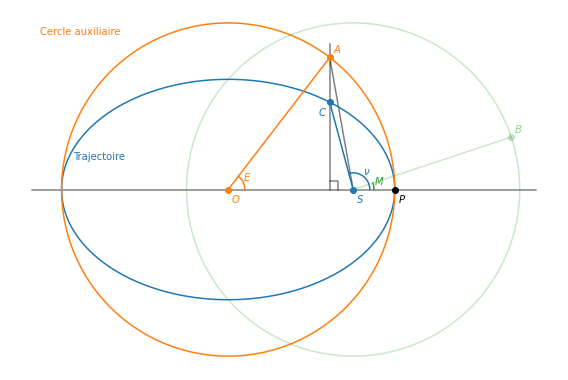

In [19]:
nus           = np.linspace(0, 2*np.pi, 1001)
semimajoraxis = 1
eccentricity  = .75
ae = semimajoraxis * eccentricity

fig = plt.figure(figsize=(8,6))
ax = plt.subplot2grid((1,1), (0,0))
_ = ax.set_aspect("equal")
_ = ax.axis('off')

def rho(nu):
    p = semimajoraxis * (1-eccentricity**2)
    return p / (1+eccentricity*np.cos(nu))

nu = 7 * np.pi / 12
x_C, y_C = rho(nu)*np.cos(nu), rho(nu)*np.sin(nu)
E = 2 * np.arctan(np.sqrt((1-eccentricity)/(1+eccentricity)) * np.tan(nu/2))
x_A, y_A = semimajoraxis*np.cos(E) - ae, semimajoraxis*np.sin(E)
M = E - eccentricity*np.sin(E)
x_B, y_B = semimajoraxis*np.cos(M), semimajoraxis*np.sin(M)
x_P, y_P = semimajoraxis - ae, 0

# horizontal axis
_= ax.plot(np.array([-ae-semimajoraxis, semimajoraxis])*1.1, [0,0], "-k", alpha=.5)

_= ax.plot([x_C, x_C], [0, 1.1*y_A], "-k", alpha=.5)
_= ax.plot([x_C, x_C+.05, x_C+.05], [.05, .05, 0], "-k", alpha=.5)

_= ax.plot([0, x_A], [0, y_A], "-k", alpha=.5)

# True anomaly, Orbit
_ = ax.plot(rho(nus)*np.cos(nus), rho(nus)*np.sin(nus), "C0")
_ = ax.plot([0],[0], "oC0")
_ = ax.annotate(r"$S$", (0,0), color="C0", textcoords="offset points", xytext=(3,-3),
                horizontalalignment='left', verticalalignment='top', alpha=1)
_ = ax.plot([x_C], [y_C], "o", color="C0")
_ = ax.annotate(r"$C$", (x_C, y_C), color="C0", textcoords="offset points", xytext=(-3,-3),
                horizontalalignment='right', verticalalignment='top', alpha=1)
_ = ax.plot([0, x_C], [0, y_C], "C0")
_ = ax.plot(.1*np.cos(np.linspace(0,nu)), .1*np.sin(np.linspace(0,nu)), "C0")
_ = ax.annotate(r"$\nu$", (.1*np.cos(nu/2), .1*np.sin(nu/2)), color="C0",
                horizontalalignment='left', verticalalignment='bottom', alpha=1)

# Eccentric anomaly, Auxiliary circle
_ = ax.plot(semimajoraxis*np.cos(nus) - ae, semimajoraxis*np.sin(nus), "C1", alpha=1)
_ = ax.plot([-ae], [0], "o", color="C1")
_ = ax.annotate(r"$O$", (-ae,0), color="C1", textcoords="offset points", xytext=(3,-3),
                horizontalalignment='left', verticalalignment='top', alpha=1)
_ = ax.plot([x_A],[y_A], "o", color="C1")
_ = ax.annotate(r"$A$", (x_A, y_A), color="C1", textcoords="offset points", xytext=(3,3),
                horizontalalignment='left', verticalalignment='bottom', alpha=1)
_ = ax.plot([-ae, x_A], [0, y_A], "C1")
_ = ax.plot(.1*np.cos(np.linspace(0,E))-ae, .1*np.sin(np.linspace(0,E)), "C1")
_ = ax.annotate(r"$E$", (.1*np.cos(E/2)-ae, .1*np.sin(E/2)), color="C1",
                horizontalalignment='left', verticalalignment='bottom', alpha=1)

# Mean anomaly
_ = ax.plot(semimajoraxis*np.cos(nus), semimajoraxis*np.sin(nus), "C2", alpha=.25)
_ = ax.plot([x_B], [y_B], "oC2", alpha=.25)
_ = ax.annotate(r"$B$", (x_B, y_B), color="C2", textcoords="offset points", xytext=(3,3),
                horizontalalignment='left', verticalalignment='bottom', alpha=.5)
_ = ax.plot([0, x_B], [0, y_B], "C2", alpha=.25)
_ = ax.plot(.125*np.cos(np.linspace(0,M)), .125*np.sin(np.linspace(0,M)), "C2")
_ = ax.annotate(r"$M$", (.125*np.cos(M/2), .125*np.sin(M/2)), color="C2",
                horizontalalignment='left', verticalalignment='bottom', alpha=1)

_ = ax.plot([x_P], [y_P], "ok")
_ = ax.annotate(r"$P$", (x_P, y_P), color="k", textcoords="offset points", xytext=(3,-3),
                horizontalalignment='left', verticalalignment='top', alpha=1)

_ = ax.annotate("Cercle auxiliaire", (-1.9, 1), color="C1", textcoords="offset points", xytext=(3,-3),
                horizontalalignment='left', verticalalignment='top', alpha=1)
_ = ax.annotate("Trajectoire", (-1.7, .25), color="C0", textcoords="offset points", xytext=(3,-3),
                horizontalalignment='left', verticalalignment='top', alpha=1)

mysavefig("kepler_equation.png")

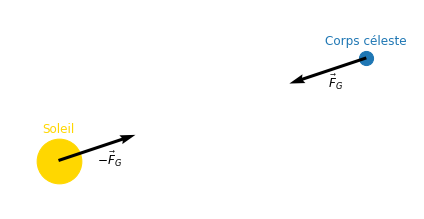

In [20]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot2grid((1,1), (0,0))
ax.set_aspect("equal")
ax.axis('off')

x, y = 3, 1

ax.scatter(0,0, marker="o", color="gold", s=2000)
ax.annotate("Soleil", (0,0), color="gold", textcoords="offset points", xytext=(0,25),
            horizontalalignment='center', verticalalignment='bottom', alpha=1, fontsize="large")
ax.quiver(0,0, x/4,y/4, scale=1, angles='xy', scale_units='xy')
ax.annotate(r"$-\vec{F}_{G}$", (x/8, y/8), color="k", textcoords="offset points", xytext=(0,-2),
            horizontalalignment='left', verticalalignment='top', alpha=1, fontsize="large")

ax.scatter(x,y, marker="o", color="C0", s=200)
ax.annotate("Corps céleste", (x,y), color="C0", textcoords="offset points", xytext=(0,10),
            horizontalalignment='center', verticalalignment='bottom', alpha=1, fontsize="large")
ax.quiver(x,y, -x/4,-y/4, scale=1, angles='xy', scale_units='xy')
ax.annotate(r"$\vec{F}_{G}$", (x-x/8, y-y/8), color="k", textcoords="offset points", xytext=(0,-2),
            horizontalalignment='left', verticalalignment='top', alpha=1, fontsize="large")

ax.set_xlim(-.5, x+.5)
ax.set_ylim(-.5, y+.5)

mysavefig("kepler_problem_article.png")

568 days, 0:00:00


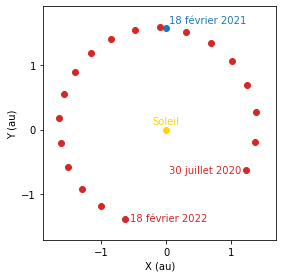

In [21]:
body = CelestialBody("Mars")

debut = datetime.datetime(2020,7,30)
fin   = datetime.datetime(2022,2,18)
pas   = (fin-debut).days/19

print(fin-debut)

positions = body.data("position", start=debut, stop=fin, step=pas)

fig = plt.figure(figsize=(4,4))
sps = (1, 1)
ax = plt.subplot2grid(sps, (0, 0))
x, y = positions[:,0],  positions[:,1]
ax.plot(x,y,"oC3")

ax.plot([0], [0] ,"o", color="gold")
ax.set_aspect("equal")
ax.set_xlabel("X (au)")
ax.set_ylabel("Y (au)")

ax.annotate("Soleil", (0,0), color="gold", textcoords="offset points", xytext=(0,3),
            horizontalalignment='center', verticalalignment='bottom', alpha=1)
ax.annotate("30 juillet 2020", (x[0],y[0]), color="C3", textcoords="offset points", xytext=(-5,0),
            horizontalalignment='right', verticalalignment='center', alpha=1)
ax.annotate("18 février 2022", (x[-1],y[-1]), color="C3", textcoords="offset points", xytext=(5,0),
            horizontalalignment='left', verticalalignment='center', alpha=1)

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-2,-1,0,1,2])

ax.set_xlim(-1.9,1.7)
ax.set_ylim(-1.7,1.9)

date = datetime.datetime(2021,2,18) 
body.date = date
x, y, z = body.position
ax.plot([x],[y],"oC0")
ax.annotate("18 février 2021", (x,y), color="C0", textcoords="offset points", xytext=(3,3),
            horizontalalignment='left', verticalalignment='bottom', alpha=1)

mysavefig("positions_mars.png")

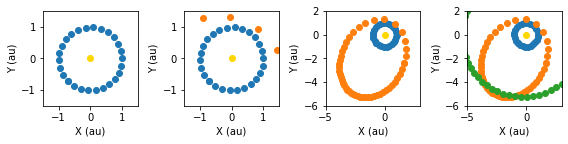

In [22]:
body = CelestialBody("Earth")
data_terre = body.data("position", step=14)
x_terre, y_terre = data_terre[:,0], data_terre[:,1]
# Tchouri
body = CelestialBody("Churyumov-Gerasimenko")
data_tchouri = body.data("position", step=49)
x_tchouri, y_tchouri = data_tchouri[:,0], data_tchouri[:,1]
# Jupiter
body = CelestialBody("Jupiter")
data_jupiter = body.data("position", step=70)
x_jupiter, y_jupiter = data_jupiter[:,0], data_jupiter[:,1]

fig = plt.figure(figsize=(8,4))
sps = (1,4)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (0,2))
ax4 = plt.subplot2grid(sps, (0,3))

for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.plot([0],[0], "o", color="gold")
    ax.set_xlabel("X (au)")
    ax.set_ylabel("Y (au)")
    ax.set_aspect("equal")
    ax.plot(x_terre, y_terre, "o", color="C0")
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    if i>0:
        ax.plot(x_tchouri, y_tchouri, "o", color="C1")
    if i>1:
        ax.set_xlim(-5, 3)
        ax.set_ylim(-6, 2)
    if i>2:
        ax.plot(x_jupiter, y_jupiter, "o", color="C2")
    
mysavefig("tp_tchouri_steps.png")

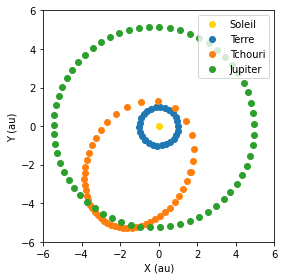

In [35]:
fig = plt.figure(figsize=(4,4))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))

ax.plot([0],[0], "o", color="gold", label="Soleil")
ax.set_xlabel("X (au)")
ax.set_ylabel("Y (au)")
ax.set_aspect("equal")
ax.plot(x_terre, y_terre, "o", color="C0", label="Terre")
ax.plot(x_tchouri, y_tchouri, "o", color="C1", label="Tchouri")
ax.plot(x_jupiter, y_jupiter, "o", color="C2", label="Jupiter")
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

ax.legend()

mysavefig("tp_tchouri_final.png")

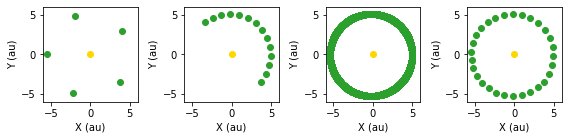

In [24]:
body = CelestialBody("Jupiter")

fig = plt.figure(figsize=(8,4))
sps = (1,4)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (0,2))
ax4 = plt.subplot2grid(sps, (0,3))

data = body.data("position", step=body.period/5)
x, y = data[:,0], data[:,1]
ax1.plot(x,y, "oC2")

data = body.data("position", step=1)
x, y = data[:,0], data[:,1]
ax3.plot(x,y, "oC2")

start = datetime.datetime.today()
stop  = start+datetime.timedelta(days=2000) 
data = body.data("position", start=start, stop=stop, step=150)
x, y = data[:,0], data[:,1]
ax2.plot(x,y, "oC2")

data = body.data("position", step=150)
x, y = data[:,0], data[:,1]
ax4.plot(x,y, "oC2")

for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.plot([0],[0], "o", color="gold")
    ax.set_xlabel("X (au)")
    ax.set_ylabel("Y (au)")
    ax.set_aspect("equal")
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

mysavefig("tp_tchouri_modif.png")

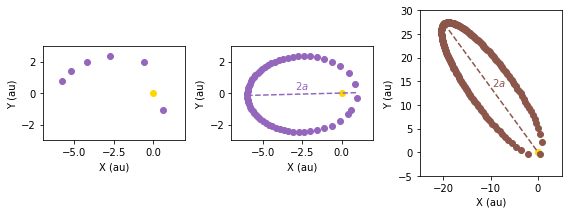

In [28]:
fig = plt.figure(figsize=(8,4))
sps = (1,3)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (0,2))

for i, ax in enumerate([ax1, ax2, ax3]):
    ax.plot([0],[0], "o", color="gold")
    ax.set_xlabel("X (au)")
    ax.set_ylabel("Y (au)")
    ax.set_aspect("equal")
    if i<2:
        ax.set_xlim(-7, 2)
        ax.set_ylim(-3, 3)
    else:
        ax.set_xlim(-25, 5)
        ax.set_ylim(-5, 30)

body = CelestialBody("Finlay", category="comet")
start = datetime.datetime.today()
stop  = start+datetime.timedelta(days=1000) 
data = body.data("position", start=start, stop=stop, step=200)
x, y = data[:,0], data[:,1]
ax1.plot(x,y, "oC4")

data = body.data("position", step=40)
x, y = data[:,0], data[:,1]
ax2.plot(x,y, "oC4")

xp = body.a * (1 - body.e)
xa = xp - 2 * body.a
Xp, Yp, _ = body.orbital_to_ecliptic_coordinates(xp, 0, 0)
Xa, Ya, _ = body.orbital_to_ecliptic_coordinates(xa, 0, 0)
ax2.plot([Xa, Xp], [Ya, Yp], "--C4")
ax2.annotate(r"$2a$", ((Xa+Xp)/2, (Ya+Yp)/2), color="C4", textcoords="offset points", xytext=(0,3),
            horizontalalignment='center', verticalalignment='bottom', alpha=1)


body = CelestialBody("Halley", category="comet")
data = body.data("position", start=datetime.datetime(2001,3,1), step=125)
x, y = data[:,0], data[:,1]
ax3.plot(x,y, "oC5")

xp = body.a * (1 - body.e)
xa = xp - 2 * body.a
Xp, Yp, _ = body.orbital_to_ecliptic_coordinates(xp, 0, 0)
Xa, Ya, _ = body.orbital_to_ecliptic_coordinates(xa, 0, 0)
ax3.plot([Xa, Xp], [Ya, Yp], "--C5")
ax3.annotate(r"$2a$", ((Xa+Xp)/2, (Ya+Yp)/2), color="C5", textcoords="offset points", xytext=(7,7),
            horizontalalignment='center', verticalalignment='center', alpha=1)

mysavefig("tp_kepler_comete.png")

Value computed:
2.012343999811386e+30 +/- 4.522595627582038e+25
1.988409870698051e+30 +/- 4.468805426856864e+25


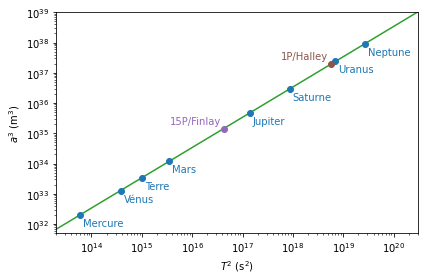

In [26]:
from fitting.fitting import Fit
import astropy.constants as const

fig = plt.figure(figsize=(6,4))

sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))

au = const.au.value

names = ["Mercure", "Vénus", "Terre", "Mars", "Jupiter", "Saturne", "Uranus", "Neptune"]
periods = np.array([88.0, 224.7, 365.2, 687.0, 4331, 10747, 30589, 59800]) * 24 * 3600
semimajoraxes = np.array([57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2872.5, 4495.1]) * 1e9

fitter = Fit("linear", x=periods**2, y=semimajoraxes**3, verbosemode=False)
fit_params, u_params = fitter.fit()
slope, y0 = fit_params
u_slope, u_y0 = u_params

x = np.logspace(6, 11)
ax.loglog(x**2, slope * x**2, "C2")
for name, p, a in zip(names, periods, semimajoraxes):
    ax.annotate(name, (p**2,a**3), color="C0", textcoords="offset points", xytext=(3,-3),
                horizontalalignment='left', verticalalignment='top', alpha=1)
ax.loglog(periods**2, semimajoraxes**3, "oC0")

body = CelestialBody("Finlay", category="comet")
ax.loglog(np.array([body.period*24*3600])**2, np.array([body.a*au])**3, "oC4")
ax.annotate(body.fullname, ((body.period*24*3600)**2,(body.a*au)**3), color="C4", textcoords="offset points", xytext=(-3,3),
            horizontalalignment='right', verticalalignment='bottom', alpha=1)

body = CelestialBody("Halley", category="comet")
ax.loglog(np.array([body.period*24*3600])**2, np.array([body.a*au])**3, "oC5")
ax.annotate(body.fullname, ((body.period*24*3600)**2,(body.a*au)**3), color="C5", textcoords="offset points", xytext=(-3,3),
            horizontalalignment='right', verticalalignment='bottom', alpha=1)

ax.set_xlabel(r"$T^2$ $(\mathrm{s}^2)$")
ax.set_ylabel(r"$a^3$ $(\mathrm{m}^3)$")
ax.set_xlim(2e13, 3e20)
ax.set_ylim(5e31, 1e39)

mysavefig("kepler_third_law_art.png")

M_sun   = (4*np.pi**2*slope/const.G).value
u_M_sun_squared = ((4*np.pi**2*slope/const.G**2 * const.G.uncertainty)**2).value + ((4*np.pi**2/const.G * u_slope)**2).value

print("Value computed:")
print(M_sun, "+/-", np.sqrt(u_M_sun_squared))
print(const.M_sun.value, "+/-", const.M_sun.uncertainty)

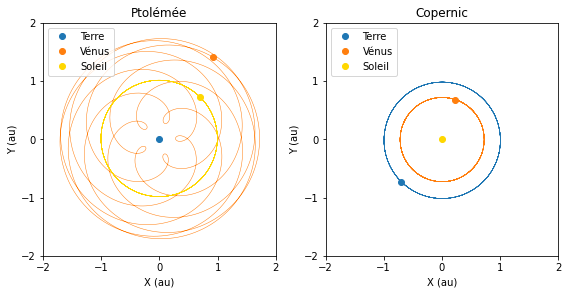

In [13]:
from celestialbody import display

start       = datetime.datetime.today()
stop        = start + datetime.timedelta(days=8*365.25)
step        = 2
names       = ["Earth", "Venus"]

fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1))

for ax, ref in zip([ax1, ax2], ["Earth", "Sun"]):
    names, coord_sun, coord_ref, dates = display.prepare_data(names, ref=ref, start=start, stop=stop, step=step)

    Xs, Ys, Zs = coord_ref

    for X, Y in zip(Xs, Ys):
        ax.plot(X,Y)
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    ax.clear()

    positions, trajectories = [], []
    for i, name in enumerate(names[:-1]):
        if name == "Sun":
            label = "Soleil"
            color = "gold"
        elif name == "Earth":
            label = "Terre"
            color = "C"+str(i)
        elif name == "Venus":
            label = "Vénus"
            color = "C"+str(i)
        position,   = ax.plot([], [], "o", color=color, label=label)
        trajectory, = ax.plot([], [], "-", color=color, linewidth=.5)
        positions.append(position)
        trajectories.append(trajectory)

    for X, Y, position, trajectory in zip(Xs, Ys, positions, trajectories):
        position.set_data(X[0], Y[0])
        trajectory.set_data(X, Y)

    ax.legend(loc="upper left")
    ax.set_aspect("equal")
    ax.set_xlabel("X (au)")
    ax.set_ylabel("Y (au)")
    names       = ["Earth", "Venus"]
    
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    
    ax.set_xticks([-2,-1,0,1,2])
    ax.set_yticks([-2,-1,0,1,2])

ax1.set_title("Ptolémée")
ax2.set_title("Copernic")

mysavefig("ptolemy_vs_copernicus_article.png")

(1.5, 6)

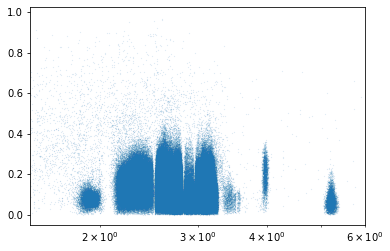

In [23]:
a = celestialbody.collect_param("a", "asteroid")
e = celestialbody.collect_param("e", "asteroid")

plt.semilogx(a,e,".", ms=.1)
plt.xlim(1.5,6)

In [ ]:
Cet article présente un module Python permettant de calculer la position de nombreux objets du système
solaire et son utilisation dans le cadre des nouveaux programmes de lycée, où la programmation est devenue
incontournable. La première partie présente le cadre théorique dans lequel sont réalisés les calculs de
position. La deuxième décrit sommairement le fonctionnement général du module disponible en ligne. Enfin,
plusieurs applications directement exploitables en classe par l’enseignant et les élèves sont présentées,
notamment dans le cadre du thème mouvement et interaction des programmes de lycée.